# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [44]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Definir os ativos e o período
ativos = ["AAPL", "TSLA", "AMZN"]
inicio = "2021-01-01"
fim = "2023-12-31"

# Baixar os dados
dados = {}
for ativo in ativos:
    dados[ativo] = yf.download(ativo, start=inicio, end=fim)

# Salvar os dados corretamente
for ativo in ativos:
    df = dados[ativo].reset_index()  
    df.to_csv(f"{ativo}_dados.csv", index=False)  
    print(f"Dados do ativo {ativo} salvos com sucesso!")

print("Todos os dados foram baixados e salvos corretamente.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Dados do ativo AAPL salvos com sucesso!
Dados do ativo TSLA salvos com sucesso!
Dados do ativo AMZN salvos com sucesso!
Todos os dados foram baixados e salvos corretamente.


#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

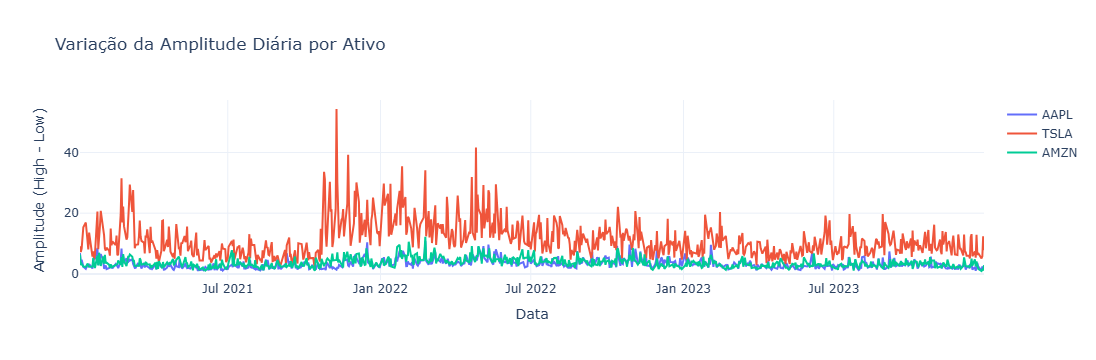

Volatilidade média por ativo:
TSLA: 11.34
AMZN: 3.63
AAPL: 3.32

Ativo com maior volatilidade média: TSLA (11.34)


In [46]:
# Calcular a amplitude diária (High - Low) e adicionar uma coluna
for ativo, df in dados.items():
    df["Amplitude"] = df["High"] - df["Low"]

# Criar um gráfico interativo com Plotly
fig = go.Figure()

# Adicionar os dados de cada ativo ao gráfico
for ativo, df in dados.items():
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df["Amplitude"],
        mode='lines',
        name=ativo,
        hovertemplate=f"<b>{ativo}</b><br>Data: {{x}}<br>Amplitude: {{y:.2f}}<extra></extra>"
    ))

# Configurar o layout do gráfico
fig.update_layout(
    title="Variação da Amplitude Diária por Ativo",
    xaxis_title="Data",
    yaxis_title="Amplitude (High - Low)",
    template="plotly_white",
    hovermode="x unified"
)

# Mostrar o gráfico interativo
fig.show()

print("Volatilidade média por ativo:")
for ativo, vol in maior_volatilidade:
    print(f"{ativo}: {vol:.2f}")

print(f"\nAtivo com maior volatilidade média: {maior_volatilidade[0][0]} ({maior_volatilidade[0][1]:.2f})")